In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
npz_file_path = "fsl_cp_images_sample/24279-G12-1.npz"
npz_data = np.load(npz_file_path)

# Display the keys to understand the structure
npz_data.files

# print(type(npz_data.files))

['sample', 'filenames']

In [ ]:
from numpy import load

data = load('D:/UoE/Coursework/MLP/Project/fsl_cp_images_sample/24279-G12-1.npz')
print(data)
sample = data['sample']
print(sample)
# lst = data.files
# for item in lst:
#     print(item)
#     print(data[item])

In [5]:
# Extract the data from the 'sample' key
image_data = npz_data['sample']

# Check the shape of the extracted data
image_data.shape


(520, 696, 5)

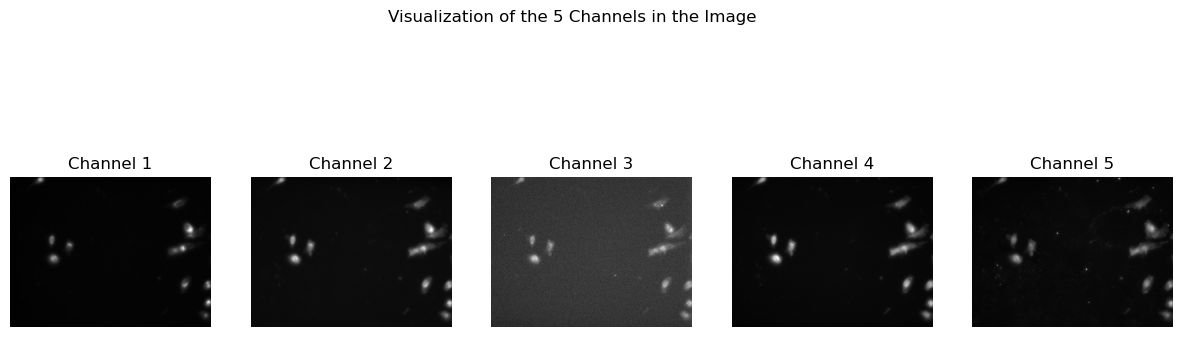

In [6]:
# Plot each of the 5 channels separately
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].imshow(image_data[:, :, i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Channel {i+1}')

plt.suptitle("Visualization of the 5 Channels in the Image")
plt.show()


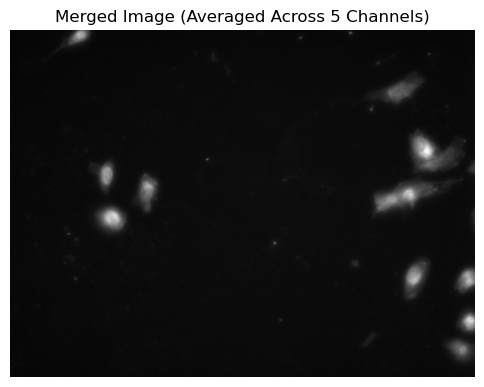

In [7]:
# Merge all 5 channels by averaging them into a single grayscale image
merged_image = np.mean(image_data, axis=2)

# Display the merged image
plt.figure(figsize=(6, 6))
plt.imshow(merged_image, cmap='gray')
plt.axis('off')
plt.title("Merged Image (Averaged Across 5 Channels)")
plt.show()


In [8]:
import os

# Directory containing the .npz files
directory = "fsl_cp_images_sample/"
# Base output directory
output_base_dir = "fsl_cp_images_sample/fsl_cp_sample_viz_images/"

# Ensure base output directory exists
os.makedirs(output_base_dir, exist_ok=True)


# List all .npz files in the directory
npz_files = [f for f in os.listdir(directory) if f.endswith(".npz")]

# Iterate over each .npz file and process it
for npz_file in npz_files:
    file_path = os.path.join(directory, npz_file)
    npz_data = np.load(file_path)  # Load .npz file
    print(f"Processing: {npz_file}")
    
    # If 'sample' key exists, process the image data
    if 'sample' in npz_data.files:
        image_data = npz_data['sample']
        # Create a folder for the image file
        image_folder = os.path.join(output_base_dir, npz_file.replace('.npz', ''))
        os.makedirs(image_folder, exist_ok=True)

        # Save each channel as a separate image
        for i in range(image_data.shape[2]):
            plt.figure(figsize=(6, 6))
            plt.imshow(image_data[:, :, i], cmap='gray')
            plt.axis('off')
            plt.title(f'Channel {i+1}')
            
            # Save the image
            channel_image_path = os.path.join(image_folder, f"channel_{i+1}.png")
            plt.savefig(channel_image_path, bbox_inches='tight', pad_inches=0.1)
            plt.close()

        print(f"Saved channel images for {npz_file} in {image_folder}")
        print(f"Image Shape: {image_data.shape}")
    else:
        print("No 'sample' key found in this file.")
    
    print("-" * 40)  # Separator for readability

    
print("Visualization and saving completed.")
# Done iterating over all .npz files
print("Iteration completed.")


Processing: 24279-G12-1.npz
Saved channel images for 24279-G12-1.npz in fsl_cp_images_sample/fsl_cp_sample_viz_images/24279-G12-1
Image Shape: (520, 696, 5)
----------------------------------------
Processing: 24279-G12-2.npz
Saved channel images for 24279-G12-2.npz in fsl_cp_images_sample/fsl_cp_sample_viz_images/24279-G12-2
Image Shape: (520, 696, 5)
----------------------------------------
Processing: 24279-G12-3.npz
Saved channel images for 24279-G12-3.npz in fsl_cp_images_sample/fsl_cp_sample_viz_images/24279-G12-3
Image Shape: (520, 696, 5)
----------------------------------------
Processing: 24279-G12-4.npz
Saved channel images for 24279-G12-4.npz in fsl_cp_images_sample/fsl_cp_sample_viz_images/24279-G12-4
Image Shape: (520, 696, 5)
----------------------------------------
Processing: 24279-G12-5.npz
Saved channel images for 24279-G12-5.npz in fsl_cp_images_sample/fsl_cp_sample_viz_images/24279-G12-5
Image Shape: (520, 696, 5)
----------------------------------------
Processing